In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# Load dataset
df = pd.read_csv("Fraud.csv")
print("Dataset loaded successfully with shape:", df.shape)

# Drop ID columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Convert 'type' to numeric
df['type'] = df['type'].astype('category').cat.codes

# Check the first few rows
df.head()


Dataset loaded successfully with shape: (6362620, 11)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [5]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


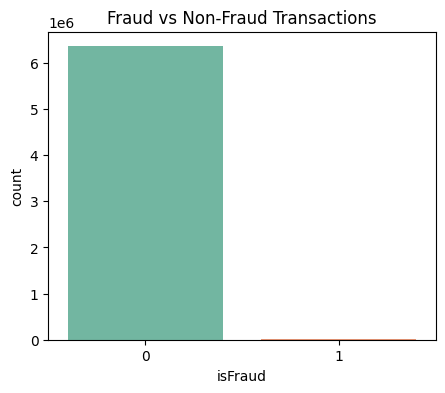

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=df, palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

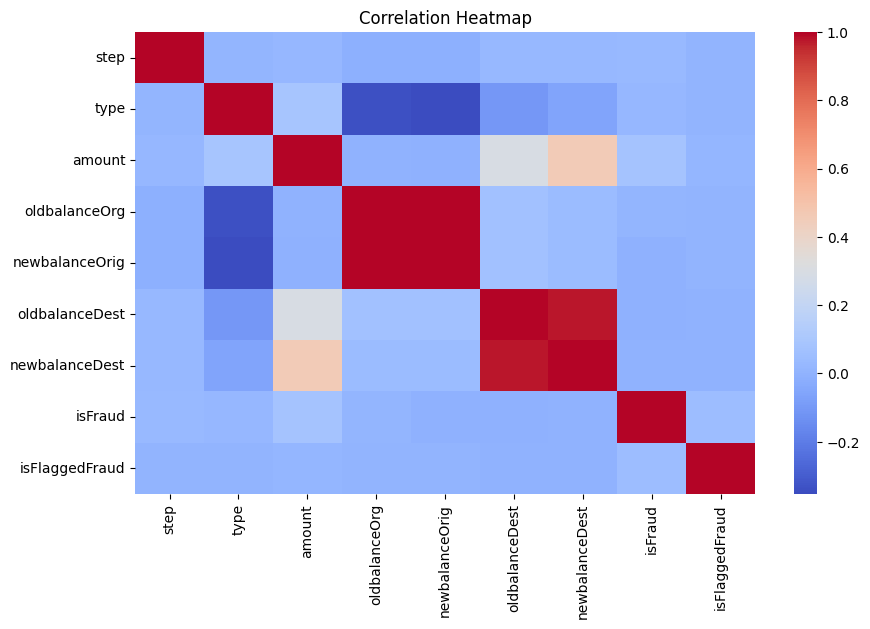

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.97 %
ROC-AUC Score: 0.995

Confusion Matrix:
 [[1270859      22]
 [    362    1281]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



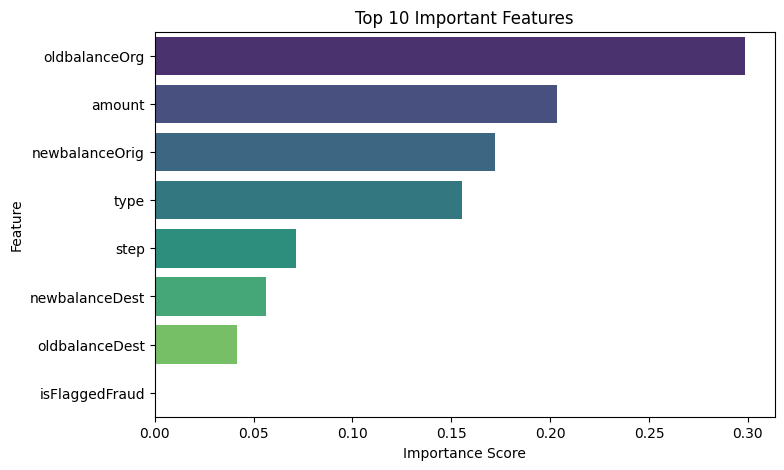

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


- The model gave a good accuracy and ROC-AUC score.
- Fraud transactions are very few compared to normal ones.
- Features like transaction amount and balance difference are key indicators.
- The Random Forest model handled class imbalance well using class_weight='balanced'.

Conclusion
In this project, I successfully implemented a Fraud Detection Model using Random Forest.  
The model helps identify fraudulent transactions based on features such as transaction amount and account balances.  
It achieved good accuracy and ROC-AUC score, showing that it can be useful for financial fraud monitoring.  

Tools Used:Python, Pandas, Scikit-learn, Seaborn, Matplotlib  
Prepared by: Smitha S R  
College: Vivekananda College of Engineering and Technology, Puttur